In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [74]:
data = pd.read_csv('Humidity_data.csv')

In [75]:
data.shape

(120, 5)

In [76]:
data.head()

,Humidity,Fiber sensing region,Chitosan Wt,LED color,Output Intensity
0,30,1 cm,1 gm,White,122
1,35,1 cm,1 gm,White,120
2,40,1 cm,1 gm,White,118
3,45,1 cm,1 gm,White,115
4,50,1 cm,1 gm,White,113


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
Humidity                 120 non-null int64
Fiber sensing region     120 non-null object
Chitosan Wt              120 non-null object
LED color                120 non-null object
Output Intensity         120 non-null int64
dtypes: int64(2), object(3)
memory usage: 4.8+ KB


In [78]:
# rename the columns
data = data.rename(columns={'Fiber sensing region ': 'Fiber_Sensing_Region'
                            ,'Chitosan Wt':'Chitosan_Weight','LED color':'LED_Color'
                            ,'Output Intensity ':'Output_Intensity'})

In [79]:
data.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Output_Intensity
0,30,1 cm,1 gm,White,122
1,35,1 cm,1 gm,White,120
2,40,1 cm,1 gm,White,118
3,45,1 cm,1 gm,White,115
4,50,1 cm,1 gm,White,113


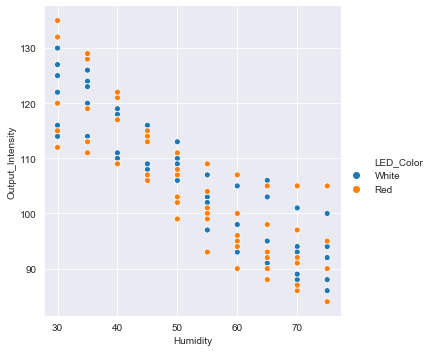

In [80]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.relplot(x="Humidity", y="Output_Intensity",hue="LED_Color", data=data);

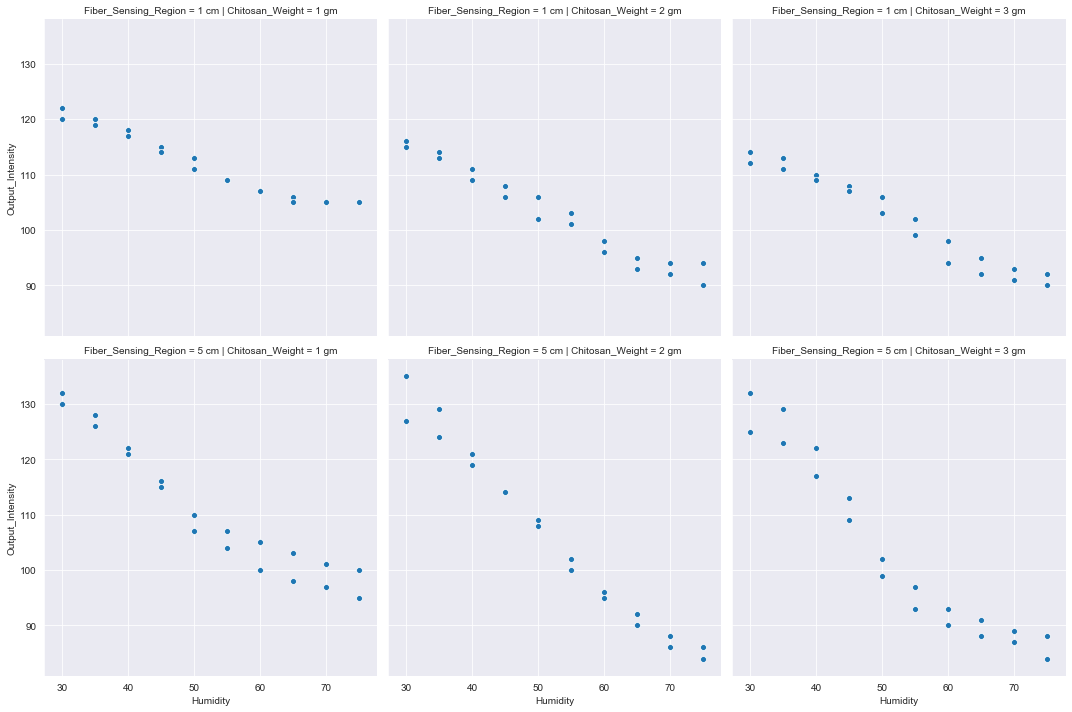

In [81]:
sns.relplot(x="Humidity", y="Output_Intensity",col='Chitosan_Weight',row='Fiber_Sensing_Region', data=data);

In [82]:
data['Fiber_Sensing_Region'].value_counts()

1 cm    60
5 cm    60
Name: Fiber_Sensing_Region, dtype: int64

In [83]:
data['Chitosan_Weight'].value_counts()

1 gm    40
3 gm    40
2 gm    40
Name: Chitosan_Weight, dtype: int64

In [84]:
data['LED_Color'].unique()

array(['White', 'Red'], dtype=object)

In [85]:
data['Chitosan_Weight'].replace('1 gm',1,inplace=True)
data['Chitosan_Weight'].replace('2 gm',2,inplace=True)
data['Chitosan_Weight'].replace('3 gm',3,inplace=True)

In [86]:
data['Chitosan_Weight'].value_counts()

3    40
2    40
1    40
Name: Chitosan_Weight, dtype: int64

In [87]:
data['Fiber_Sensing_Region']=np.where(data['Fiber_Sensing_Region']=='1 cm',1,5)

In [88]:
data['Fiber_Sensing_Region'].value_counts()

5    60
1    60
Name: Fiber_Sensing_Region, dtype: int64

In [89]:
data['LED_Color'].value_counts()

Red      60
White    60
Name: LED_Color, dtype: int64

In [90]:
data['LED_Color'] = np.where(data['LED_Color']=='White',0,1)

In [91]:
data['LED_Color'].value_counts()

1    60
0    60
Name: LED_Color, dtype: int64

In [92]:
data.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Output_Intensity
0,30,1,1,0,122
1,35,1,1,0,120
2,40,1,1,0,118
3,45,1,1,0,115
4,50,1,1,0,113


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
Humidity                120 non-null int64
Fiber_Sensing_Region    120 non-null int32
Chitosan_Weight         120 non-null int64
LED_Color               120 non-null int32
Output_Intensity        120 non-null int64
dtypes: int32(2), int64(3)
memory usage: 3.9 KB


In [94]:
data.describe()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Output_Intensity
count,120.000000,120.000000,120.00000,120.000000,120.000000
mean,52.500000,3.000000,2.00000,0.500000,106.116667
std,14.421622,2.008386,0.81992,0.502096,12.224224
min,30.000000,1.000000,1.00000,0.000000,84.000000
25%,40.000000,1.000000,1.00000,0.000000,95.750000
50%,52.500000,3.000000,2.00000,0.500000,106.000000
75%,65.000000,5.000000,3.00000,1.000000,114.000000
max,75.000000,5.000000,3.00000,1.000000,135.000000


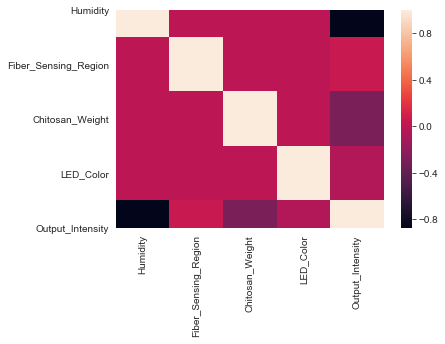

In [95]:
sns.heatmap(data.corr())

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
train,test=train_test_split(data,train_size=0.80,random_state=42)

In [98]:
train.shape,test.shape

((96, 5), (24, 5))

In [99]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)

In [100]:
del train['index']
del test['index']

In [101]:
train.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Output_Intensity
0,40,1,3,0,110
1,40,5,1,0,122
2,55,5,1,0,107
3,50,5,3,1,99
4,60,5,1,1,100


In [102]:
test.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Output_Intensity
0,50,1,3,0,106
1,65,1,3,0,95
2,50,1,1,0,113
3,55,5,3,0,97
4,60,1,2,0,98


In [103]:
x_train=train.drop('Output_Intensity',axis=1)
y_train=train['Output_Intensity']
x_test=test.drop('Output_Intensity',axis=1)
y_test=test['Output_Intensity']

In [104]:
x_train_svm = x_train.copy()
x_test_svm = x_test.copy()

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_svm)
X_train = scaler.transform(x_train_svm)
X_test = scaler.transform(x_test_svm)

In [117]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [107]:
svr = svm.SVR(kernel='rbf',C=107,gamma='auto')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

In [108]:
mean_absolute_error(y_test,y_pred)

0.5671173611513248

In [118]:
r2_score(y_test,y_pred)

0.9971593105472223

In [109]:
y_pred = pd.DataFrame(y_pred)

In [110]:
y_pred.head()

,0
0,104.766570
1,94.980179
2,111.893102
3,97.103710
4,98.536934


In [111]:
y_test.head()

0    106
1     95
2    113
3     97
4     98
Name: Output_Intensity, dtype: int64

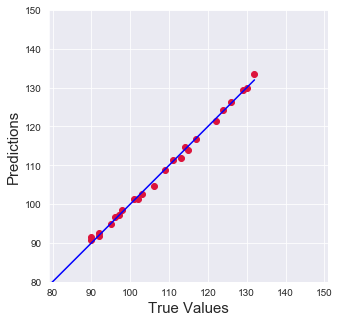

In [112]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.xlim([80,150]) 
plt.ylim([80,150])
plt.show()

In [113]:
y_pred_trn=svr.predict(X_train)

In [114]:
y_pred_trn = pd.DataFrame(y_pred_trn)

In [115]:
mean_absolute_error(y_train,y_pred_trn)

0.4521746063651088

In [116]:
mean_squared_error(y_train,y_pred_trn,squared=False)

0.8241716289939826

In [119]:
r2_score(y_train,y_pred_trn)

0.9951088317051917

In [120]:
y_train.head()

0    110
1    122
2    107
3     99
4    100
Name: Output_Intensity, dtype: int64

In [121]:
y_pred_trn.head()

,0
0,110.634049
1,121.470754
2,107.465214
3,103.785446
4,100.100314


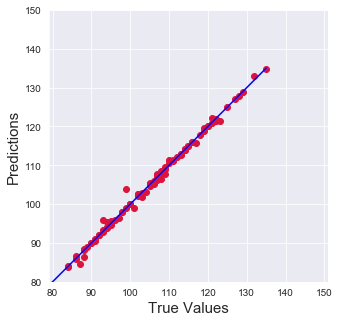

In [122]:
plt.figure(figsize=(5,5))
plt.scatter(y_train, y_pred_trn, c='crimson')

p1 = max(max(y_pred_trn), max(y_train))
p2 = min(min(y_pred_trn), min(y_train))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.xlim([80,150]) 
plt.ylim([80,150])
plt.show()

## Feature Importance List

Feature ranking:
1. feature Humidity (0.834863)
2. feature Fiber_Sensing_Region (0.088650)
3. feature Chitosan_Weight (0.063658)
4. feature LED_Color (0.012828)


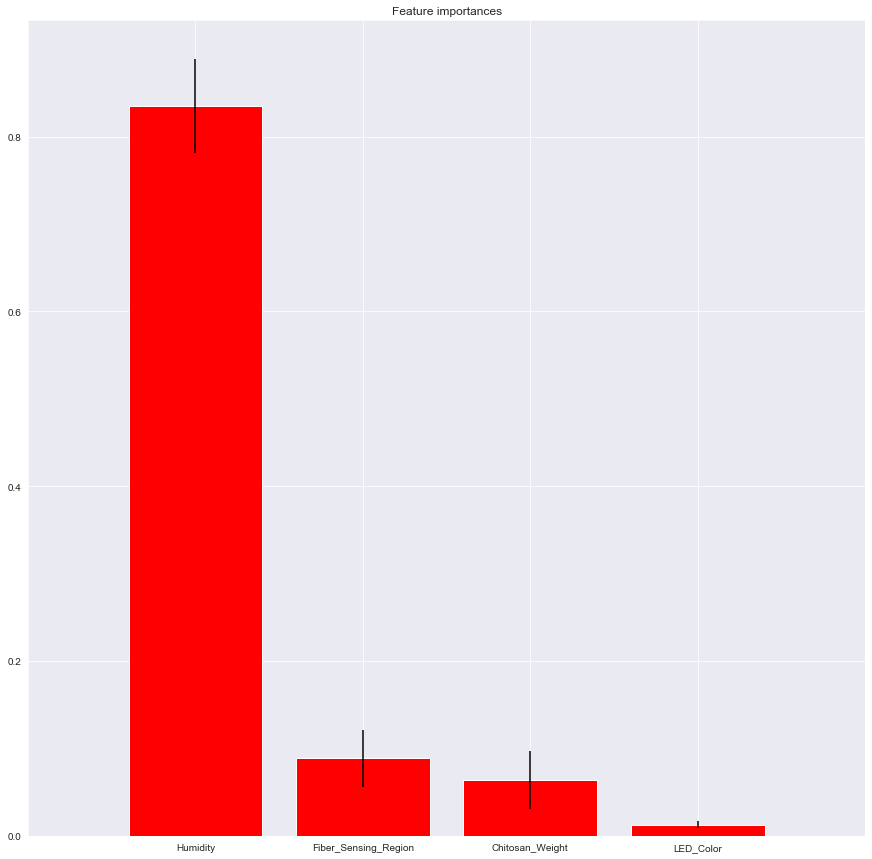

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


param_dist = {"n_estimators":[100,200,300,350],
             "max_features": [1,2,3,4,],
             "bootstrap": [True, False],
             "max_depth":[None,5,10,15,20,30,50],
             "min_samples_leaf":[1,5,10,15,20,50],
             "min_samples_split":[2,5,10,15,20,50]}

reg_rf = RandomForestRegressor()

random_search = RandomizedSearchCV(reg_rf,param_distributions=param_dist,n_iter=10,scoring='neg_mean_absolute_error'
                                   ,cv=10, n_jobs=-1,verbose=False)

random_search.fit(X_train,y_train)

rf=random_search.best_estimator_

rf.fit(X_train,y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(x_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize =(15, 15))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), labels=list(x_train.columns))
plt.xlim([-1, x_train.shape[1]])

plt.show()

In [124]:
X_train = scaler.inverse_transform(X_train)
X_test = scaler.inverse_transform(X_test)

In [125]:
x_train_svm.columns

Index(['Humidity', 'Fiber_Sensing_Region', 'Chitosan_Weight', 'LED_Color'], dtype='object')

In [126]:
X_train = pd.DataFrame(X_train,columns=['Humidity', 'Fiber_Sensing_Region', 'Chitosan_Weight', 'LED_Color'])

X_test = pd.DataFrame(X_test,columns=['Humidity', 'Fiber_Sensing_Region', 'Chitosan_Weight', 'LED_Color'])

In [127]:
X_train.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color
0,40.0,1.0,3.0,0.0
1,40.0,5.0,1.0,0.0
2,55.0,5.0,1.0,0.0
3,50.0,5.0,3.0,1.0
4,60.0,5.0,1.0,1.0


In [128]:
X_test.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color
0,50.0,1.0,3.0,0.0
1,65.0,1.0,3.0,0.0
2,50.0,1.0,1.0,0.0
3,55.0,5.0,3.0,0.0
4,60.0,1.0,2.0,0.0


In [129]:
X_train['LED_Color'] = np.where(X_train['LED_Color']==0.0,'White','Red')

In [130]:
X_train.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color
0,40.0,1.0,3.0,White
1,40.0,5.0,1.0,White
2,55.0,5.0,1.0,White
3,50.0,5.0,3.0,Red
4,60.0,5.0,1.0,Red


In [131]:
X_test['LED_Color'] = np.where(X_test['LED_Color']==0.0,'White','Red')

In [132]:
X_test.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color
0,50.0,1.0,3.0,White
1,65.0,1.0,3.0,White
2,50.0,1.0,1.0,White
3,55.0,5.0,3.0,White
4,60.0,1.0,2.0,White


In [133]:
Y_Predicted_train = pd.DataFrame(y_pred_trn.values,columns=['Predicted_Output_Intensity'])
Y_Actual_train = pd.DataFrame(y_train.values,columns=["Actual_Output_Intensity"])
Final_Comparison_train=pd.concat([X_train,Y_Actual_train,Y_Predicted_train],axis=1)

In [134]:
Final_Comparison_train.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity
0,40.0,1.0,3.0,White,110,110.634049
1,40.0,5.0,1.0,White,122,121.470754
2,55.0,5.0,1.0,White,107,107.465214
3,50.0,5.0,3.0,Red,99,103.785446
4,60.0,5.0,1.0,Red,100,100.100314


In [135]:
Y_Predicted_test = pd.DataFrame(y_pred.values,columns=['Predicted_Output_Intensity'])
Y_Actual_test = pd.DataFrame(y_test.values,columns=["Actual_Output_Intensity"])
Final_Comparison_test=pd.concat([X_test,Y_Actual_test,Y_Predicted_test],axis=1)

In [136]:
Final_Comparison_test.head(10)

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity
0,50.0,1.0,3.0,White,106,104.766570
1,65.0,1.0,3.0,White,95,94.980179
2,50.0,1.0,1.0,White,113,111.893102
3,55.0,5.0,3.0,White,97,97.103710
4,60.0,1.0,2.0,White,98,98.536934
5,50.0,1.0,1.0,Red,111,111.355890
6,45.0,5.0,1.0,Red,115,113.848817
7,30.0,5.0,1.0,White,130,129.987661
8,30.0,1.0,3.0,White,114,114.615979
9,65.0,1.0,3.0,Red,92,92.520452


In [137]:
Final_Comparison_test.shape,Final_Comparison_train.shape

((24, 6), (96, 6))

In [138]:
Final_Comparison = pd.concat([Final_Comparison_train,Final_Comparison_test],axis=0)

In [139]:
Final_Comparison.shape

(120, 6)

In [140]:
Final_Comparison.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity
0,40.0,1.0,3.0,White,110,110.634049
1,40.0,5.0,1.0,White,122,121.470754
2,55.0,5.0,1.0,White,107,107.465214
3,50.0,5.0,3.0,Red,99,103.785446
4,60.0,5.0,1.0,Red,100,100.100314


In [141]:
Final_Comparison['Error_Percentage'] = (Final_Comparison['Actual_Output_Intensity'] - Final_Comparison['Predicted_Output_Intensity']) * 100 /Final_Comparison['Actual_Output_Intensity']

In [142]:
Final_Comparison.head()

,Humidity,Fiber_Sensing_Region,Chitosan_Weight,LED_Color,Actual_Output_Intensity,Predicted_Output_Intensity,Error_Percentage
0,40.0,1.0,3.0,White,110,110.634049,-0.576408
1,40.0,5.0,1.0,White,122,121.470754,0.433808
2,55.0,5.0,1.0,White,107,107.465214,-0.434780
3,50.0,5.0,3.0,Red,99,103.785446,-4.833784
4,60.0,5.0,1.0,Red,100,100.100314,-0.100314


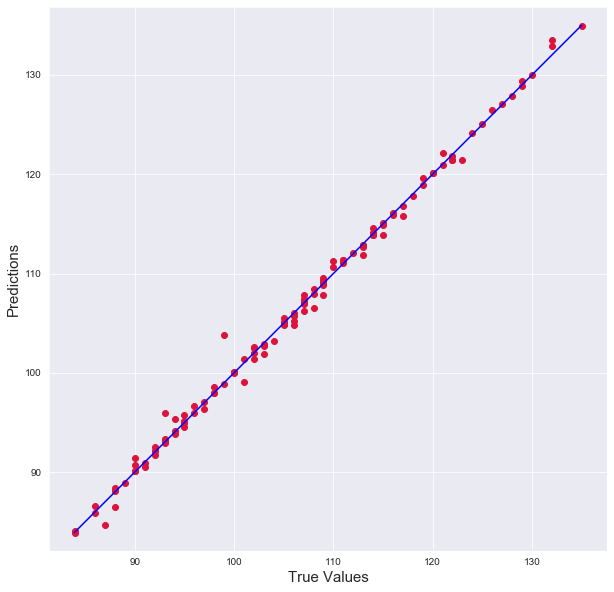

In [143]:
plt.figure(figsize=(10,10))
plt.scatter(Final_Comparison['Actual_Output_Intensity'],Final_Comparison['Predicted_Output_Intensity'], c='crimson')

p1 = max(max(Final_Comparison['Predicted_Output_Intensity']), max(Final_Comparison['Actual_Output_Intensity']))
p2 = min(min(Final_Comparison['Predicted_Output_Intensity']), min(Final_Comparison['Actual_Output_Intensity']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [144]:
Final_Comparison.to_csv('SVM_Humidity.csv',index=False)